<a href="https://colab.research.google.com/github/om-bhutki/flood_prediction/blob/main/flood_prediction_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
df= pd.read_csv('kerala.csv')
df.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [25]:
df.shape

(118, 16)

In [30]:
df = df.drop("SUBDIVISION",axis=1)
df.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [32]:
df['FLOODS'].replace(['YES', 'NO'], [1,0], inplace=True)
df.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


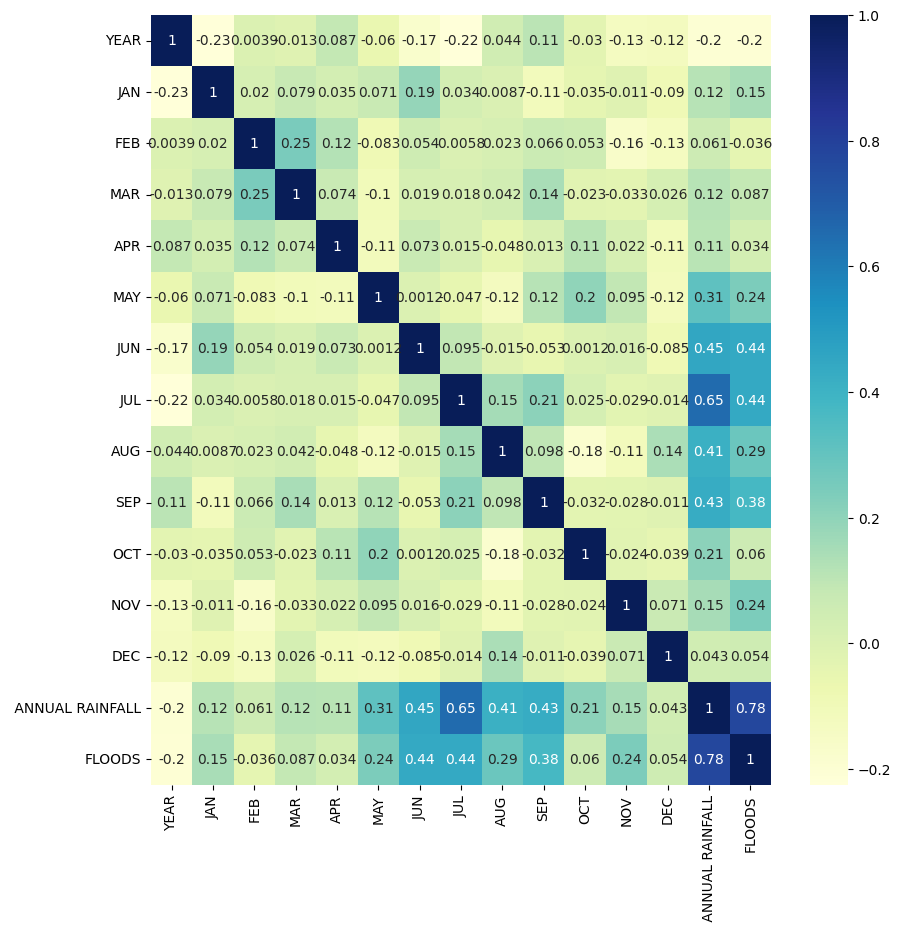

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True,ax=ax)
plt.show()

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
X= df.iloc[:,1:14]  # all features
Y= df.iloc[:,-1]

In [37]:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,Y)

In [38]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [39]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
3,APR,2.498771
1,FEB,2.571626
11,DEC,11.609546
9,OCT,12.650485
2,MAR,21.696518
0,JAN,48.413088
10,NOV,284.674615
4,MAY,656.812145
7,AUG,739.975818
8,SEP,1000.379273


In [40]:
X= df[['SEP', 'JUN', 'JUL']] # the top 3 features
Y= df[['FLOODS']] # the target output

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [42]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

       SEP     JUN     JUL
84   117.6   828.7   388.9
85   235.4   597.9   324.8
37   223.2   681.6   648.6
45   199.4   919.0   671.7
97   517.6   732.5   641.4
26   335.6   720.2   888.2
101   99.0   503.1   318.7
112  318.6  1042.7   830.2
21   222.4   663.1  1025.1
33    48.4   852.9   415.0
11   136.8   948.2   833.6
46   394.5   556.1   669.3
96   292.2   544.2   970.5
25   322.7   563.9   885.2
32   469.7   859.3   773.4
99   195.8   633.8   343.2
108  326.5   438.2   924.9
51    57.4   576.7   430.0
29   411.5   633.1   401.7
64   150.1   597.7   465.1
28   268.9   946.6   844.0
90    48.5  1096.1   905.5
89   103.3   528.6   635.4
54   438.5   782.4   392.8
35   286.7   620.8   672.1
43   155.0   498.9   614.1
73   383.6   266.9  1004.2
80   376.6   912.4   489.8
36   139.8   485.6   970.5
75   116.2   196.8   641.5
22   254.3   722.5  1008.7
82   421.1   322.8   583.2
113  298.8   454.4   677.8
5    131.2   414.9   954.2
105  474.8   482.4   804.0
23   289.1  1011.7  1526.5
1

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred, zero_division=1))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=1))
print("CL Report:",metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.8541666666666666
Recall:  0.8846153846153846
Precision: 0.8518518518518519
CL Report:               precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.85      0.88      0.87        26

    accuracy                           0.85        48
   macro avg       0.85      0.85      0.85        48
weighted avg       0.85      0.85      0.85        48



In [45]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

In [46]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [47]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

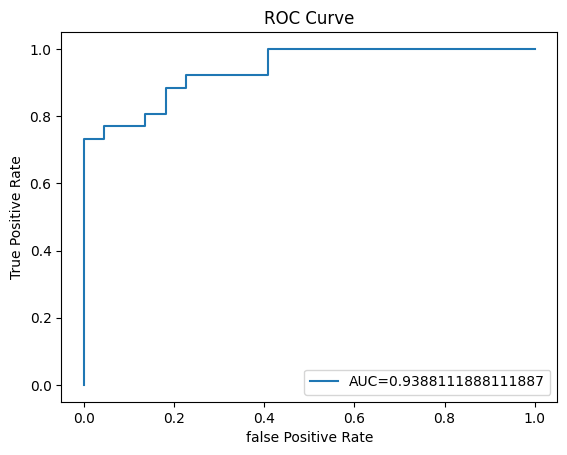

In [48]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)